In [1]:
import pandas as pd

In [2]:
viewers_data = pd.read_csv("../viewers.csv")
viewers_data.head()

,username,country_of_user,title,date_watched,percentage_watched,age
0,cjarrett0,Indonesia,Valeria,1/7/2019,92,21
1,rasbury1,New Zealand,The Massively Mixed-Up Middle School Mystery,10/25/2015,39,69
2,fedds2,Iraq,Boi,8/17/2016,37,77
3,amunehay3,United States,Super Deluxe,11/9/2019,24,12
4,dterrazzo4,Macedonia,Chance Pe Dance,9/8/2015,85,50


In [3]:
shows_data = pd.read_csv("../cleaned_netflix_data.csv")
shows_data.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas"
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [4]:
# get genres from shows_data and merge with viewers_data
genres = shows_data[['title', 'listed_in']]

viewers_data['genres'] = viewers_data['title'].map(genres.set_index('title')['listed_in'])
viewers_data.head()


,username,country_of_user,title,date_watched,percentage_watched,age,genres
0,cjarrett0,Indonesia,Valeria,1/7/2019,92,21,"International TV Shows, Romantic TV Shows, Spa..."
1,rasbury1,New Zealand,The Massively Mixed-Up Middle School Mystery,10/25/2015,39,69,"Children & Family Movies, Comedies"
2,fedds2,Iraq,Boi,8/17/2016,37,77,"Dramas, Independent Movies, International Movies"
3,amunehay3,United States,Super Deluxe,11/9/2019,24,12,"Comedies, Dramas, International Movies"
4,dterrazzo4,Macedonia,Chance Pe Dance,9/8/2015,85,50,"Comedies, Dramas, International Movies"


In [7]:
viewers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   username            30000 non-null  object
 1   country_of_user     30000 non-null  object
 2   title               30000 non-null  object
 3   date_watched        30000 non-null  object
 4   percentage_watched  30000 non-null  int64 
 5   age                 30000 non-null  int64 
 6   genres              30000 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.6+ MB


create the recommendations based on a clustering model (K-means)

In [8]:
# date to datetime
#from sklearn.preprocessing import MinMaxScaler
#import time
#model_data
#model_data['date_watched'] = pd.to_datetime(model_data['date_watched'])
#model_data['date_watched'] = model_data['date_watched'].apply(lambda x: time.mktime(x.timetuple()))
#scaler = MinMaxScaler()
#model_data['date_watched'] = scaler.fit_transform(model_data[['date_watched']])
#model_data.head()



First I scale the date_watched column. But then I decided to add a new column about how many days ago user watched the show. subtract todays date from the date_watched.

In [9]:
# number of days between today and the date watched
#model_data = viewers_data.copy()
#model_data['days_ago'] = (pd.to_datetime('today') - pd.to_datetime(model_data['date_watched'])).dt.days
#model_data = model_data.drop(['date_watched'], axis=1)
#model_data.head()

In [10]:
# encode the country column
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#model_data['country_of_user'] = le.fit_transform(model_data['country_of_user'])
#model_data.head()

In [11]:
#scale numerical columns
from sklearn.preprocessing import StandardScaler
model_data = viewers_data.copy()
scaler = StandardScaler()
numerical_cols = ['age', 'percentage_watched']
scaler.fit(model_data[numerical_cols])
scaled_data = scaler.transform(model_data[numerical_cols])
scaled_data

array([[-1.2920143 ,  1.43813473],
       [ 0.83193696, -0.39985088],
       [ 1.18592883, -0.46920883],
       ...,
       [ 1.40717375,  0.98730807],
       [ 0.30094914, -1.1627883 ],
       [-0.05304273,  0.77923423]])

In [12]:
from sklearn.cluster import KMeans

# Elbow method to find optimal number of clusters
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [13]:
import matplotlib.pyplot as plt

def generate_elbow_plot(clusters_centers, k_values):
    
    plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

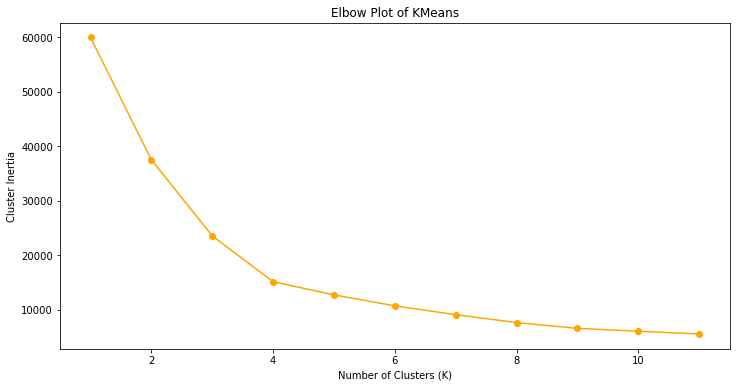

In [14]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)


Optimal num of clusters is 4.

In [15]:
# KMeans clustering
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(scaled_data)

model_data['cluster'] = kmeans_model.labels_
model_data.head()

,username,country_of_user,title,date_watched,percentage_watched,age,genres,cluster
0,cjarrett0,Indonesia,Valeria,1/7/2019,92,21,"International TV Shows, Romantic TV Shows, Spa...",1
1,rasbury1,New Zealand,The Massively Mixed-Up Middle School Mystery,10/25/2015,39,69,"Children & Family Movies, Comedies",0
2,fedds2,Iraq,Boi,8/17/2016,37,77,"Dramas, Independent Movies, International Movies",0
3,amunehay3,United States,Super Deluxe,11/9/2019,24,12,"Comedies, Dramas, International Movies",3
4,dterrazzo4,Macedonia,Chance Pe Dance,9/8/2015,85,50,"Comedies, Dramas, International Movies",1


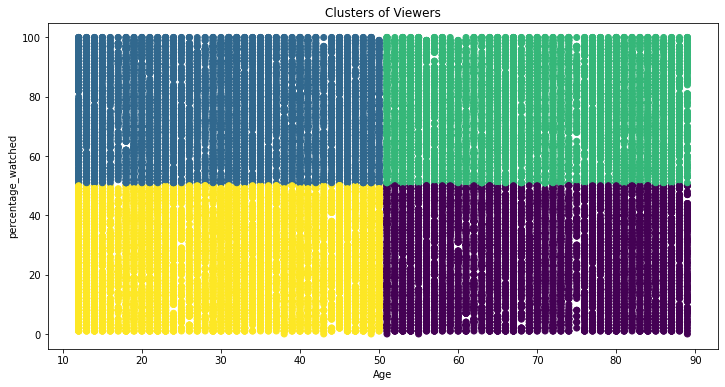

In [17]:
# Visualize clusters
plt.subplots(figsize = (12, 6))
plt.scatter(model_data['age'], model_data['percentage_watched'], c = model_data['cluster'])
plt.xlabel("Age")
plt.ylabel("percentage_watched")
plt.title("Clusters of Viewers")
plt.show()

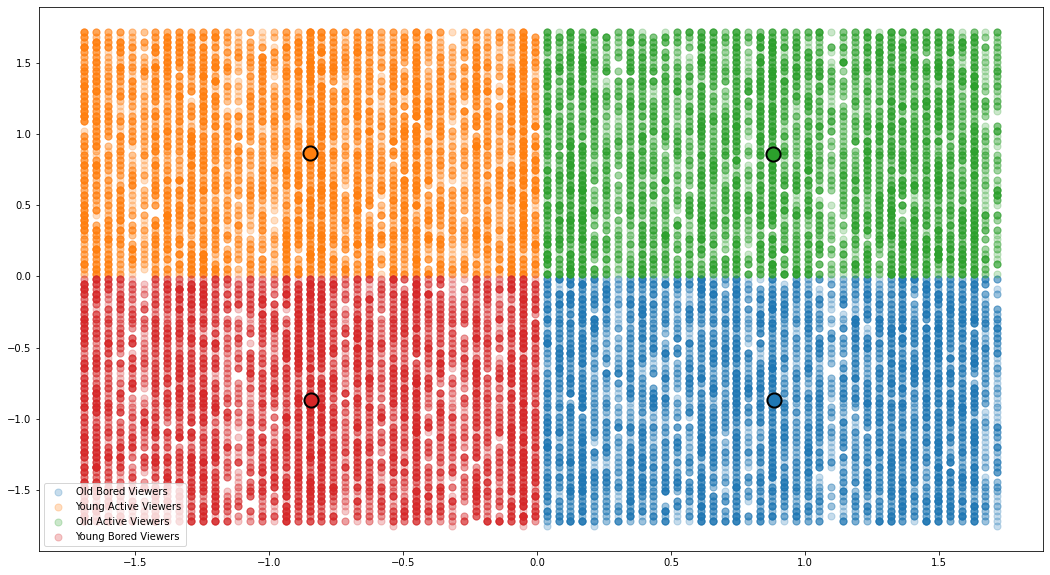

In [19]:
# name clusters
import matplotlib.cm as cm
from itertools import cycle

X = scaled_data
colors = cycle(cm.tab10.colors)
y_kmeans = kmeans_model.predict(X)
centers = kmeans_model.cluster_centers_

plt.figure(figsize=(18, 10))
labels = {0: "Old Bored Viewers", 1: "Young Active Viewers", 2: "Old Active Viewers", 3: "Young Bored Viewers"}

for i in range(4):
    color = next(colors)
    idx = y_kmeans == i
    plt.scatter(X[idx, 0], X[idx, 1], color=color, s=50, label=labels[i], alpha=0.25)
    # plot center
    plt.scatter(centers[i, 0], centers[i, 1], edgecolors="k", linewidth=2, color=color, s=200, alpha=1)
plt.legend()

In [20]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_data, kmeans_model.predict(scaled_data))
        

0.4022478713696945

In [34]:
# get user's genres based on shows he watched

def get_user_genres(username):
    user_shows = model_data[model_data['username'] == username]

    user_genres = user_shows['genres'].str.split(',').tolist()

    # make one list and remove duplicates
    user_genres = [item for sublist in user_genres for item in sublist]
    user_genres = list(set(user_genres))
    return user_genres

In [35]:
# get recommendations function 
def get_recommendations(username):
        
        # get the user's cluster
        user_cluster = model_data.loc[model_data['username'] == username]['cluster'].values[0]
        
        # get the user's shows
        user_shows = model_data.loc[model_data['username'] == username]['title'].values
        
        # get the users in the same cluster with the same genre love
        cluster_users = model_data[(model_data['cluster'] == user_cluster) & (model_data['genres'].isin(get_user_genres(username)))]
        
        # get the shows of the users in the same cluster
        cluster_shows = cluster_users['title'].values
        
        # get the shows that the user has not watched
        recommendations = list(set(cluster_shows) - set(user_shows))
        
        return recommendations[:10]

In [39]:
get_recommendations('fedds2')

['Octonauts & the Great Barrier Reef',
 'Swiped',
 'Theo Von: No Offense',
 'D.L. Hughley: Contrarian',
 'Blanche Gardin: I talk to myself',
 'Ninja Assassin',
 'Tiffany Haddish: She Ready! From the Hood To Hollywood!',
 'The Impossible',
 'Steve Jobs',
 'Search Party']

In [40]:
# save the model using pickle
import pickle
pickle.dump(model_data, open('../models/model_data.pkl', 'wb'))